In [1]:
import random
import numpy as np

import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
%precision 12
from __future__ import division

%matplotlib inline
plt.style.use('ggplot')

In [36]:
def generator(N):
    X = np.zeros((N, 19))
    for j in range(N):
        firstline = np.random.randint(0,2,8)
        secline = np.zeros(8)
        translation = np.random.randint(0,3)
        thirdline = np.zeros(3)
        if translation == 0: # left
            for i in range(8):
                secline[i] = firstline[(i+1)%8]
                thirdline[0] = 1
        elif translation == 1: # stay
            for i in range(8):
                secline[i] = firstline[i]
                thirdline[1] = 1
        else :
            for i in range(8): # right 
                secline[i] = firstline[(i-1)%8]
                thirdline[2] = 1
        X[j] = np.concatenate((firstline,secline,thirdline))
    X=(X-0.5)*2
    return X

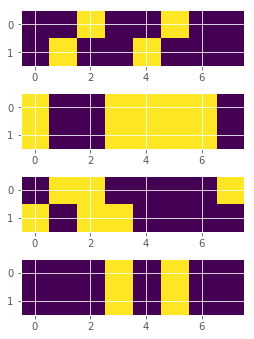

In [217]:
def display(X):
    plt.imshow(X[:16].reshape((2,8)))


N = 10000
XX2 = generator (N)
    
wake = np.zeros((19,19))
v = np.zeros((19,19,19))
for i in range(19):
    for j in range(19):
        for k in range(N):
            wake[i,j] += XX2[k][i]*XX2[k][j]
            for l in range(19):
                v[i,j,l] += 1/2*XX2[k][i]*XX2[k][j]*XX2[k][l]
                

fig = plt.figure(figsize=(4,15))
for j in range(5):
    ax = fig.add_subplot(10, 1, j+1)
    display(XX2[j])

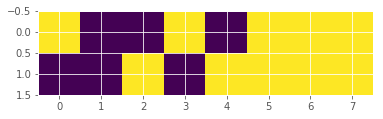

In [210]:
testX = generator(1)[0]
testX[16:] = 1
display(testX)

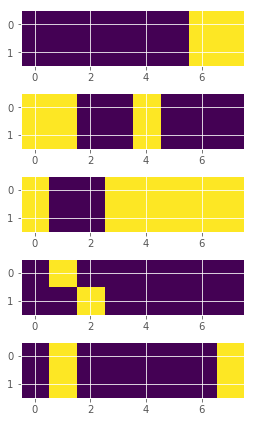

In [178]:
N = 2000
XX2 = generator (N)
    
wake = np.zeros((19,19))
v = np.zeros((19,19,19))
for i in range(19):
    for j in range(19):
        for k in range(N):
            wake[i,j] += XX2[k][i]*XX2[k][j]
            for l in range(19):
                v[i,j,l] += 1/2*XX2[k][i]*XX2[k][j]*XX2[k][l]
                



In [358]:
def display(X):
    plt.imshow(X[:16].reshape((2,8)))

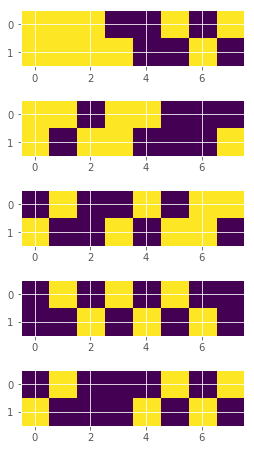

In [357]:
XX2 = generator(5)
fig = plt.figure(figsize=(4,8))
for j in range(5):
    ax = fig.add_subplot(5, 1, j+1)
    display(XX2[j])

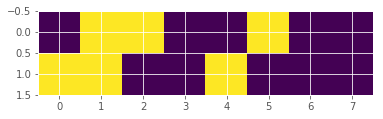

In [180]:
testX = generator(1)[0]
testX[16:] = 1
display(testX)

In [335]:
XX2 = generator(N)
N = 10000
T = 1
eta1 = 0.1
eta2 = 0.1
def Temp(T, N, n):
    if n < N/2:
        return 2*T/N*(N/2-n)+0.01
    else :
        return 0.001

wake = np.zeros((19,19))
v = np.zeros((19,19,19))
for k in range(N):
    for i in range(19):
        for j in range(19):
        
            wake[i,j] += eta1*XX2[k][i]*XX2[k][j]/Temp(T,N,k)
            for l in range(19):
                v[i,j,l] += eta2/2*XX2[k][i]*XX2[k][j]*XX2[k][l]/Temp(T,N,k)
            a = np.dot(wake,XX2[k])+1/2*np.dot(np.dot(v,XX2[k]),XX2[k])
            if random.random() < 1/(1+np.exp(a[j])):
                XX2[k][j] = 1
            else :
                XX2[k][j]= -1             



/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


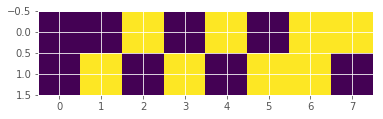

In [343]:
testX = generator(1)[0]
testX[16:] = 1
display(testX)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


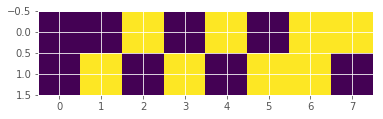

In [348]:
turn = 0
turns = 100

for j in range(turns):
    for i in range(19):
        a = np.dot(wake,testX)+1/2*np.dot(np.dot(v,testX),testX)
        if random.random() < 1/(1+np.exp(-a[i])):
            testX[i] = 1
        else :
            testX[i]=-1

display(testX)

In [89]:
testX[16:]

array([-1., -1.,  1.])

In [360]:
testX[16:]

array([ 1., -1., -1.])

In [167]:
S = 1000
test = generator(S)
result = test[:,16:]

test[:,16:] = 1

for t in range(T):
    for i in range(19):
        a = np.dot(wake,test[t])+1/2*np.dot(np.dot(v,test[t]),test[t])
        if random.random() < 1/(1+np.exp(-2*a[i])):
            test[t][i] = 1
        else :
            test[t][i]=-1

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [168]:
sum(result == test[:,16:])

array([1000, 1000, 1000])

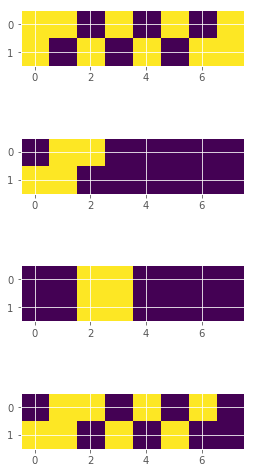

In [364]:
N=4
XX2 = generator (4)
    
wake = np.zeros((19,19))
v = np.zeros((19,19,19))
for i in range(19):
    for j in range(19):
        for k in range(N):
            wake[i,j] += XX2[k][i]*XX2[k][j]
            for l in range(19):
                v[i,j,l] += 1/2*XX2[k][i]*XX2[k][j]*XX2[k][l]
                



In [373]:
XX2.shape

(4, 19)

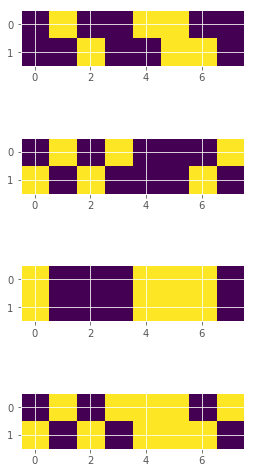

In [375]:
XX2= np.array([[ -1.,  1., -1.,  -1., 1.,  1., -1.,  -1.,  -1., -1.,  1., -1.,  -1.,
        1.,  1.,  -1.,  1., -1., -1.],
       [-1.,  1.,  -1., 1., -1., -1., -1., 1.,  1.,  -1., 1., -1., -1.,
        -1., 1., -1.,  -1., -1., 1.],
       [1., -1.,  -1.,  -1., 1., 1., 1., -1., 1., -1.,  -1.,  -1., 1.,
        1., 1., -1., -1.,  1., -1.],
       [-1.,  1.,  -1., 1.,  1., 1.,  -1., 1.,  1.,  -1., 1.,  -1., 1.,
         1., 1., -1.,  1., -1., -1.]])
fig = plt.figure(figsize=(4,9))
for j in range(4):
    ax = fig.add_subplot(4, 1, j+1)
    display(XX2[j])